<a href="https://colab.research.google.com/github/Naraenbaskaran18/Ridge-Regression/blob/main/Boston_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [2]:
class RidgeRegression:
    def __init__(self, alpha=1):
        self.alpha = alpha
        self.theta = None
        
    def cost_function(self, X, y, theta):
        m = len(y) 
        y_pred = X.dot(theta)
        cost = (1/(2*m)) * np.sum((y_pred - y)**2) + (self.alpha/(2*m)) * np.sum(theta[1:]**2)
        return cost
    
    def gradient_function(self, X, y, theta):
        m = len(y)
        y_pred = X.dot(theta)
        grad = (1/m) * (X.T.dot(y_pred - y)) + (self.alpha/m) * np.concatenate(([0], theta[1:]))
        return grad
    
    def fit(self, X, y, learning_rate=0.01, num_iterations=1000):
        m, n = X.shape
        X = np.concatenate((np.ones((m, 1)), X), axis=1)
        self.theta = np.zeros(n+1)
        
        for i in range(num_iterations):
            grad = self.gradient_function(X, y, self.theta)
            self.theta = self.theta - learning_rate * grad
            
    def predict(self, X):
        m = X.shape[0]
        X = np.concatenate((np.ones((m, 1)), X), axis=1)
        return X.dot(self.theta)
    
    def grid_search(self, X_train, y_train, X_test, y_test, alpha_values, learning_rate_values, num_iterations_values):
        best_alpha = None
        best_learning_rate = None
        best_num_iterations = None
        best_r2 = -np.inf
        
        for alpha in alpha_values:
            for learning_rate in learning_rate_values:
                for num_iterations in num_iterations_values:
                    self.alpha = alpha
                    self.fit(X_train, y_train, learning_rate=learning_rate, num_iterations=num_iterations)
                    y_pred = self.predict(X_test)
                    r2 = r2_score(y_test, y_pred)
                    if r2 > best_r2:
                        best_r2 = r2
                        best_alpha = alpha
                        best_learning_rate = learning_rate
                        best_num_iterations = num_iterations
        
        self.alpha = best_alpha
        self.fit(X_train, y_train, learning_rate=best_learning_rate, num_iterations=best_num_iterations)
        print("Best hyperparameters:")
        print("alpha:", best_alpha)
        print("learning rate:", best_learning_rate)
        print("num iterations:", best_num_iterations)
        print("best R2 score:", best_r2)

In [3]:
# load the Boston Housing dataset
boston = fetch_openml(name='boston')
X, y = boston.data, boston.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# create an instance of the RidgeRegression class
ridge_reg = RidgeRegression()

# fit the model to the training data
ridge_reg.fit(X_train, y_train)

In [5]:
# Define the hyperparameters to search over
alpha_values = [0.01, 0.1, 1, 10]
learning_rate_values = [0.001, 0.01,0.1]
num_iterations_values = [100,1000,10000]

In [6]:
#Perform grid search to find the best hyperparameters
ridge_reg.grid_search(X_train, y_train, X_test, y_test, alpha_values, learning_rate_values, num_iterations_values)

Best hyperparameters:
alpha: 0.01
learning rate: 0.1
num iterations: 10000
best R2 score: 0.6687562987931833


In [7]:
# make predictions on the train data
y_pred_train = ridge_reg.predict(X_train)
# compute the R2 score
r2 = r2_score(y_train, y_pred_train)
print("R2 score on test set:", r2)

R2 score on test set: 0.7508856342503366


In [40]:
# make predictions on the test data
y_pred = ridge_reg.predict(X_test)
# compute the R2 score
Ridge_score_2 = r2_score(y_test, y_pred)
print("R2 score on test set:", Ridge_score_2)

R2 score on test set: 0.6678811676096412


In [9]:
# compute the mse
mse = mean_squared_error(y_test, y_pred)
print("mse:", mse)

mse: 24.291353757523503


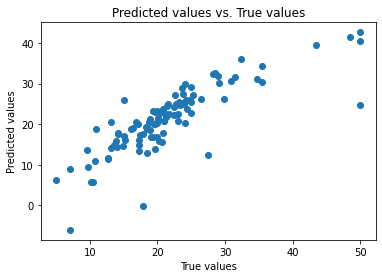

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Predicted values vs. True values')
plt.show()

SK-LEARN

In [11]:
# Importing the basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [12]:
# Importing the dataset from sklearn 
# The name of the dataset is boston

from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(


In [13]:
df=boston

In [14]:
data=pd.DataFrame(df.data,columns=df.feature_names)

In [15]:
data['Price']=df.target

In [16]:
# Spliting the features and target in x and y variables 


x1=data.iloc[:,:-1]
y1=data.iloc[:,-1]

In [17]:
# Spliting the dataset into train and test part

from sklearn.model_selection import train_test_split


In [18]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.30,random_state=40)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train1=scaler.fit_transform(x_train1)
x_test1=scaler.transform(x_test1)


In [20]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [21]:
ridge_model=ridge.fit(x_train1,y_train1)

In [22]:
ridge_predict=ridge.predict(x_test1)

In [23]:
ridge_model.coef_

array([-0.60430617,  0.87819698, -0.43775812,  0.86148537, -1.94515396,
        2.35236886, -0.15574484, -2.82704925,  2.07756317, -1.5240697 ,
       -1.73475925,  0.63223194, -3.20464176])

In [24]:
ridge_model.intercept_

22.331355932203394

In [25]:
# ### Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean squared error:",mean_squared_error(y_test1,ridge_predict))
print("Mean absolute error:",mean_absolute_error(y_test1,ridge_predict))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test1,ridge_predict)))

Mean squared error: 31.893066960579368
Mean absolute error: 3.9078243776859987
Root mean squared error: 5.647394705577021


In [41]:
from sklearn.metrics import r2_score
Ridge_score= r2_score(y_test1,ridge_predict)
print(Ridge_score)


0.7209970306495048


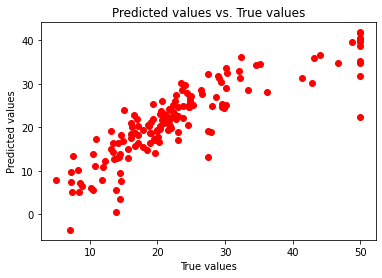

In [42]:
plt.scatter(y_test1, ridge_predict,c='RED')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Predicted values vs. True values')
plt.show()

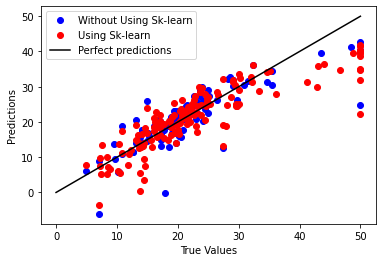

In [27]:
import matplotlib.pyplot as plt

# suppose you have two sets of predicted values from two different models, y_pred1 and y_pred2

# plot the predictions from the first model in blue
plt.plot(y_test, y_pred, 'bo', label='Without Using Sk-learn')

# plot the predictions from the second model in red
plt.plot(y_test1, ridge_predict, 'ro', label='Using Sk-learn')

# add a diagonal line to represent perfect predictions
plt.plot([0, 50], [0, 50], 'k-', label='Perfect predictions')

# set the axis labels and legend
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

# show the plot
plt.show()

Without Hyperparameter

In [33]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(


In [34]:
class RidgeRegression:
    def __init__(self, alpha=1):
        self.alpha = alpha
        self.theta = None
        
    def cost_function(self, X, y, theta):
        m = len(y) 
        y_pred = X.dot(theta)
        cost = (1/(2*m)) * np.sum((y_pred - y)**2) + (self.alpha/(2*m)) * np.sum(theta[1:]**2)
        return cost
    
    def gradient_function(self, X, y, theta):
        m = len(y)
        y_pred = X.dot(theta)
        grad = (1/m) * (X.T.dot(y_pred - y)) + (self.alpha/m) * np.concatenate(([0], theta[1:]))
        return grad
    
    def fit(self, X, y, learning_rate=0.01, num_iterations=1000):
        m, n = X.shape
        X = np.concatenate((np.ones((m, 1)), X), axis=1)
        self.theta = np.zeros(n+1)
        
        for i in range(num_iterations):
            grad = self.gradient_function(X, y, self.theta)
            self.theta = self.theta - learning_rate * grad
            
    def predict(self, X):
        m = X.shape[0]
        X = np.concatenate((np.ones((m, 1)), X), axis=1)
        return X.dot(self.theta)
    

In [35]:

# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
# create an instance of the RidgeRegression class
model = RidgeRegression(alpha=0.1)

# fit the model to the training data
model.fit(X_train, y_train)

In [39]:
# make predictions on the test data
y_pred = model.predict(X_test)

# compute the R2 score
from sklearn.metrics import r2_score
Ridge_score_1 = r2_score(y_test, y_pred)
print("R2 Score:", Ridge_score_1)
     

R2 Score: 0.6543397824732914


In [38]:

mse = mean_squared_error(y_test, y_pred)
print("mse:", mse)
     

mse: 25.348571439253714


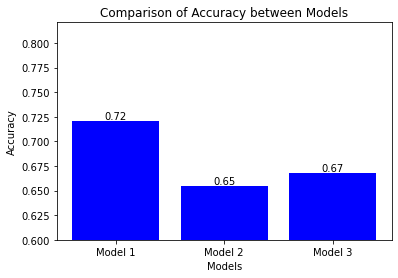

In [47]:
import matplotlib.pyplot as plt

# Define the accuracy data for each model
model1_acc = Ridge_score
model2_acc = Ridge_score_1
model3_acc = Ridge_score_2

# Define the labels and positions for the bars
labels = ['Model 1', 'Model 2', 'Model 3']
x_pos = [i for i, _ in enumerate(labels)]

# Define the heights of the bars
heights = [model1_acc, model2_acc, model3_acc]

# Plot the bar graph
plt.bar(x_pos, heights, color='blue')

# Set the y-axis limit
plt.ylim([0.6, max(heights) + 0.1])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy between Models")

# Add x-axis tick labels
plt.xticks(x_pos, labels)

# Add annotations for each bar
for i, v in enumerate(heights):
    plt.annotate(str(round(v, 2)), xy=(i, v), ha='center', va='bottom')

# Display the graph
plt.show()
